### Table of contents
[Predefined functions](#funcs)

[Parameters, filenames and directories](#params)

[Reading maps](#readMaps)

[Visualizing maps](#visual)

In [17]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from func_visualizations import plotSOM, plotSOMRow
from func_maps import readMaps
from os.path import join
from os import mkdir

### Parameters, filenames and directories
<a id='params'>#params<a>

In [18]:
### Files and directories ###
dirSOM=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle'
nameOfExperiment='ex017'
dirMaps='maps'
dirPlots='plots'
mkdir(join(dirSOM,nameOfExperiment,dirPlots))
mapsAllKeys=['mapsTrainOnTrain','mapsTestOnTrain','mapsDeimosOnTrain','mapsRunOnTrain',
             'mapsTrainOnRun','mapsTestOnRun','mapsDeimosOnRun','mapsRunOnRun',
             'mapsTrainOnRunBig','mapsTestOnRunBig','mapsDeimosOnRunBig','mapsRunOnRunBig']

In [4]:
idCol='Seq'
specZ='specZ'
photoZ_ML='photoZ_ML'
photoZ_SED='photoZ_SED'
residML='resid_ML'
residSED='resid_SED'
residML_SED='residML_SED'
quantErr='quantErr'

In [12]:
### Format for saving images ###
imSaveFormat='.png'
#imSaveFormat='.eps'

### Reading maps
<a id='readMaps'>#readMaps<a>

In [7]:
mapsAll={}
for m in mapsAllKeys:
    mapsAll[m]=readMaps(join(dirSOM,nameOfExperiment,dirMaps),m)

### Visualizing maps
<a id='visual'>#visual<a>

Text(0.45, 0.91, 'mapsTrainOnTrain')

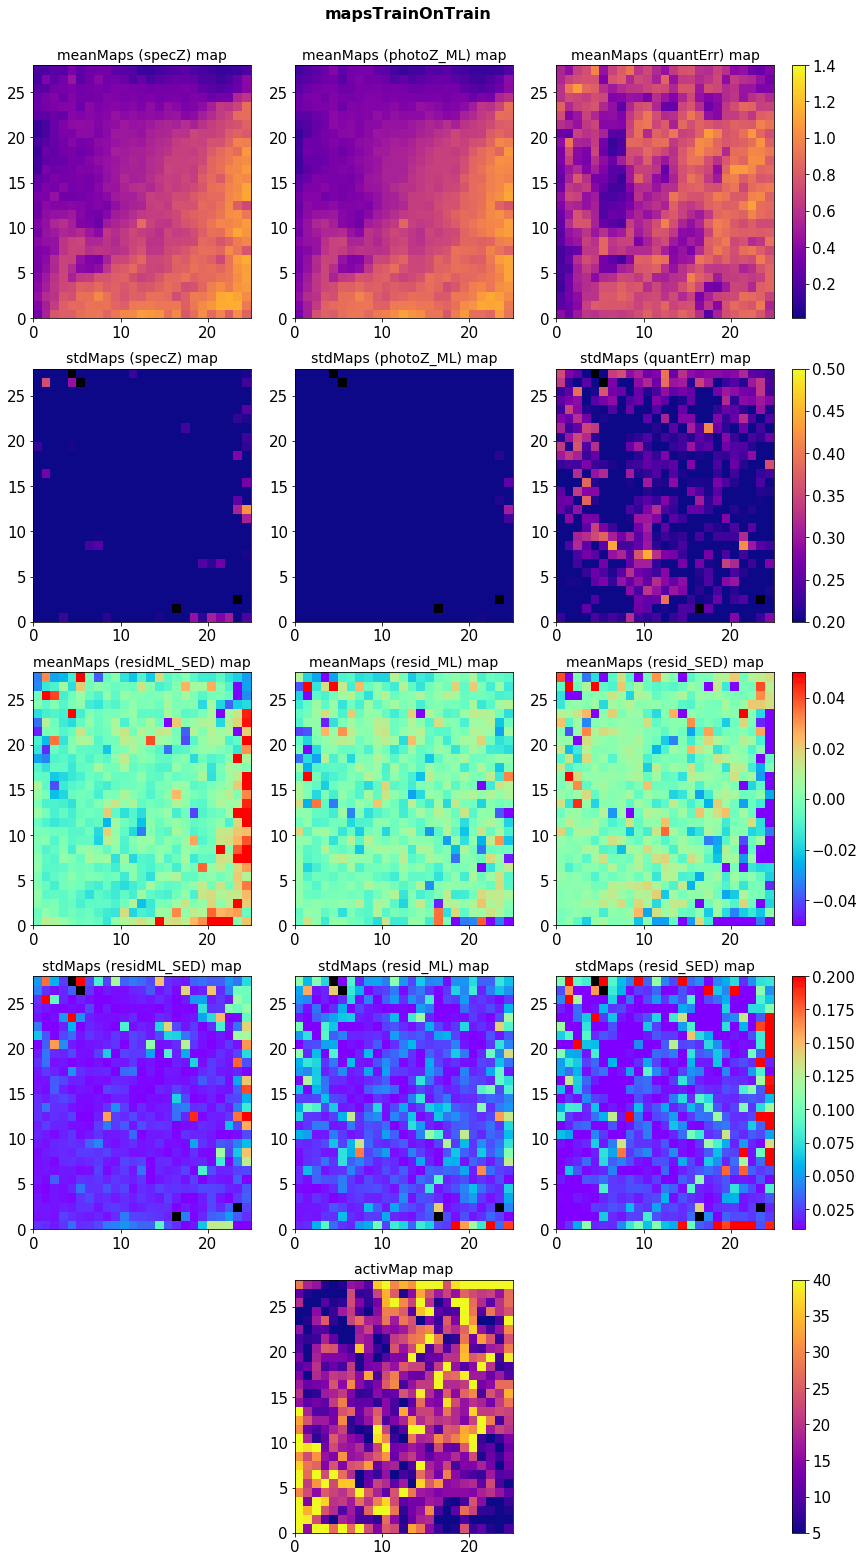

In [23]:
### Plotting all the maps for Train or Deimos datasets. ###
mapKey='mapsTrainOnTrain'

rows=5
cases=[specZ,photoZ_ML,quantErr]
fig, axes = plt.subplots(rows,len(cases),figsize=(16,27))
cbFlag=False
mapsDict=mapsAll[mapKey]
h,w=mapsDict['stdMaps'][photoZ_SED].shape[0],mapsDict['stdMaps'][photoZ_SED].shape[1]
estimators=['meanMaps','stdMaps']

plotSOMRow(mapsDict,cases,estimators[0],axes=axes, row=0,height=h, width=w,
           cmap='plasma',vmin=0.01, vmax=1.4,badVal=0,cbFlag=cbFlag,fig=fig)

plotSOMRow(mapsDict,cases,estimators[1],axes=axes, row=1,height=h, width=w,
           cmap='plasma',vmin=0.2, vmax=0.5,badVal=0,cbFlag=cbFlag,fig=fig)

cases=[residML_SED,residML,residSED]

plotSOMRow(mapsDict,cases,estimators[0],axes=axes, row=2,height=h, width=w,
           cmap='rainbow',vmin=-0.05, vmax=0.05,badVal=0,cbFlag=cbFlag,fig=fig)

plotSOMRow(mapsDict,cases,estimators[1],axes=axes, row=3,height=h, width=w,
           cmap='rainbow',vmin=0.01, vmax=0.2,badVal=0,cbFlag=cbFlag,fig=fig)

plotSOMRow(mapsDict,cases,estimator='activMap',axes=axes, row=4,height=h, width=w,
           cmap='plasma',vmin=5, vmax=40,badVal=0,cbFlag=cbFlag,axisToPlot=1,fig=fig)

fig.suptitle(mapKey,x=0.45,y=0.91,size=16,weight='bold')

In [24]:
fig.savefig(join(dirSOM,nameOfExperiment,dirPlots,mapKey+imSaveFormat))

Text(0.45, 0.91, 'mapsRunOnRunBig')

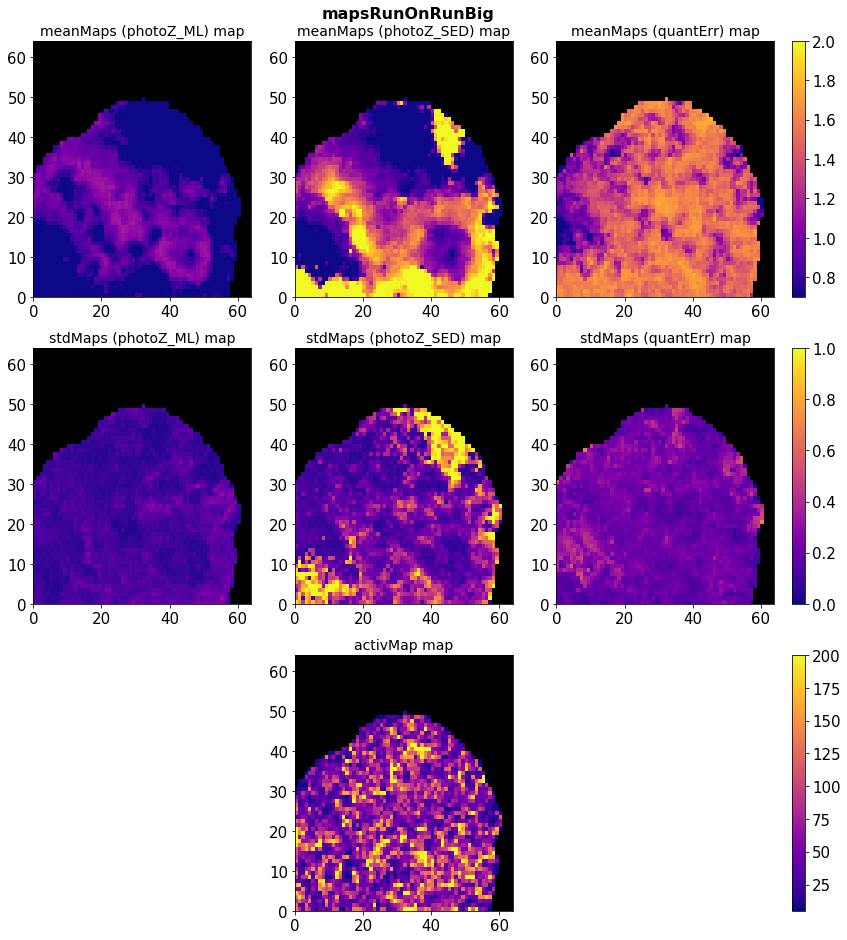

In [21]:
### Plotting all the maps for Run dataset. ###
mapKey='mapsRunOnRunBig'

rows=3
fig, axes = plt.subplots(rows,3,figsize=(16,16))

cbFlag=False
mapsDict=mapsAll[mapKey]
h,w=mapsDict['stdMaps'][photoZ_SED].shape[0],mapsDict['stdMaps'][photoZ_SED].shape[1]
estimators=['meanMaps','stdMaps']
cases=[photoZ_ML,photoZ_SED,'quantErr']

plotSOMRow(mapsDict,cases,estimators[0],axes=axes, row=0,height=h, width=w,
           cmap='plasma',vmin=0.7, vmax=2,badVal=0,cbFlag=cbFlag,fig=fig)

plotSOMRow(mapsDict,cases,estimators[1],axes=axes, row=1,height=h, width=w,
           cmap='plasma',vmin=0, vmax=1,badVal=0,cbFlag=cbFlag,fig=fig)

plotSOMRow(mapsDict,cases,estimator='activMap',axes=axes, row=2,height=h, width=w,
           cmap='plasma',vmin=5, vmax=200,badVal=0,cbFlag=cbFlag,axisToPlot=1,fig=fig)

fig.suptitle(mapKey,x=0.45,y=0.91,size=16,weight='bold')

In [22]:
fig.savefig(join(dirSOM,nameOfExperiment,dirPlots,mapKey+imSaveFormat))